In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [31]:
file = pd.read_csv('fifa21_male2.csv', low_memory=False)

In [32]:
file

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,66,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,259090,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,259091,C. Barrett,18,56,England,Burnley,56,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,https://cdn.sofifa.com/players/259/101/20_120.png,...,58+2,58+2,60+2,60+2,58+2,58+2,58+2,60+2,16+2,Male


In [33]:
print(file.columns.tolist())

['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP', 'Position', 'Player Photo', 'Club Logo', 'Flag Photo', 'POT', 'Team & Contract', 'Height', 'Weight', 'foot', 'Growth', 'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Contract', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', '

In [34]:
file = file.drop(['ID', 'Player Photo', 'Club Logo', 'Flag Photo'], axis = 1)
file

,Name,Age,OVA,Nationality,Club,BOV,BP,Position,POT,Team & Contract,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,69,Udinese 2008 ~ 2016,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,71,KAS Eupen 2014 ~ 2019,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,71,Coventry City 2016 ~ 2020,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,82,Sunderland 2009,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,81,Vissel Kobe 2018 ~ 2021,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,22,64,France,CD Tondela,66,CB,CB,69,"CD Tondela Jun 30, 2021 On Loan",...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,66,Burnley 2020 ~ 2021,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,C. Barrett,18,56,England,Burnley,56,RB,RB,67,Burnley 2020 ~ 2022,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male
17123,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,73,SK Sturm Graz 2020 ~ 2023,...,58+2,58+2,60+2,60+2,58+2,58+2,58+2,60+2,16+2,Male


In [35]:
file.columns = map(str.lower, file.columns)
file

,name,age,ova,nationality,club,bov,bp,position,pot,team & contract,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
0,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,69,Udinese 2008 ~ 2016,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,71,KAS Eupen 2014 ~ 2019,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,71,Coventry City 2016 ~ 2020,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,82,Sunderland 2009,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,81,Vissel Kobe 2018 ~ 2021,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,22,64,France,CD Tondela,66,CB,CB,69,"CD Tondela Jun 30, 2021 On Loan",...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,66,Burnley 2020 ~ 2021,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,C. Barrett,18,56,England,Burnley,56,RB,RB,67,Burnley 2020 ~ 2022,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male
17123,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,73,SK Sturm Graz 2020 ~ 2023,...,58+2,58+2,60+2,60+2,58+2,58+2,58+2,60+2,16+2,Male


In [36]:
file.dtypes.tolist()

[dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dt

In [37]:
file['wage'] = file['wage'].replace('€', '', regex=True)
file['wage'] = file['wage'].replace('K', '000', regex = True)
file = file[file['wage'] > '0']
file['wage'] = file['wage'].astype(int)

C:\Users\migue\AppData\Local\Temp\ipykernel_57364\2867403600.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file['wage'] = file['wage'].astype(int)


In [38]:
file = file[(file['age'] < 27) & (file['pot'] > 80)]

In [39]:
file = pd.DataFrame(file).reset_index()
file

,index,name,age,ova,nationality,club,bov,bp,position,pot,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
0,402,Nilmar,26,83,Brazil,Villarreal CF,82,ST,ST CF,86,...,52+1,52+1,54+1,48+1,40+1,40+1,40+1,48+1,12+1,Male
1,2846,Dudu,23,77,Brazil,Palmeiras,77,LW,LW LM CAM,82,...,52+0,52+0,57+0,52+0,41+0,41+0,41+0,52+0,18+0,Male
2,3459,R. Barkley,26,78,England,Aston Villa,81,CAM,CM CAM,81,...,70+2,70+2,67+2,65+2,64+2,64+2,64+2,65+2,17+2,Male
3,3679,Paco Alcácer,26,81,Spain,Villarreal CF,82,ST,ST,82,...,53+2,53+2,55+2,52+2,49+2,49+2,49+2,52+2,18+2,Male
4,3680,L. Digne,26,84,France,Everton,84,LB,LB,85,...,80+2,80+2,82+2,82+2,79+2,79+2,79+2,82+2,17+2,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,17080,R. Ortíz,17,62,Paraguay,Estudiantes de La Plata,64,CB,CB,82,...,59+2,59+2,57+2,59+2,62+2,62+2,62+2,59+2,14+2,Male
1131,17083,I. Touré,17,57,France,Le Havre AC,59,CB,CB,81,...,51+2,51+2,52+2,54+2,57+2,57+2,57+2,54+2,14+2,Male
1132,17092,K. Calhanoglu,17,62,Germany,FC Schalke 04,63,LM,LB LM,83,...,58+2,58+2,60+2,60+2,56+2,56+2,56+2,60+2,17+2,Male
1133,17095,L. Delap,17,61,England,Manchester City,63,ST,ST,82,...,38+2,38+2,42+2,40+2,35+2,35+2,35+2,40+2,14+2,Male


In [40]:
file = file.drop(['index'], axis = 1)

In [41]:
yearly_wages = file['wage'] * 52 * 4
yearly_wages

0       18720000
1       16640000
2       12064000
3        9360000
4       22880000
          ...   
1130      104000
1131      104000
1132      104000
1133      624000
1134      104000
Name: wage, Length: 1135, dtype: int32

In [42]:
file['release clause'] = file['release clause'].replace('€', '', regex=True)
file['release clause'] = file['release clause'].replace('K', '000', regex = True)
file['release clause'] = file['release clause'].replace('\.', '', regex = True)
file['release clause'] = file['release clause'].replace('M', '00000', regex = True)
file['release clause'] = file['release clause'].astype(int)

file['value'] = file['value'].replace('€', '', regex=True)
file['value'] = file['value'].replace('K', '000', regex = True)
file['value'] = file['value'].replace('\.', '', regex = True)
file['value'] = file['value'].replace('M', '00000', regex = True)
file['value'] = file['value'].astype(int)

transfer_value = (file['release clause'] + file['value']) / 2
transfer_value = transfer_value.astype(int)
transfer_value

0        8250000
1        4750000
2        6250000
3       23900000
4       46850000
          ...   
1130      975000
1131      394000
1132     1162500
1133     1075000
1134     1125000
Length: 1135, dtype: int32

In [43]:
total_value = yearly_wages + transfer_value
total_value

0       26970000
1       21390000
2       18314000
3       33260000
4       69730000
          ...   
1130     1079000
1131      498000
1132     1266500
1133     1699000
1134     1229000
Length: 1135, dtype: int32

In [44]:
data = pd.DataFrame(file['name'])
data['age'] = file['age']
data

,name,age
0,Nilmar,26
1,Dudu,23
2,R. Barkley,26
3,Paco Alcácer,26
4,L. Digne,26
...,...,...
1130,R. Ortíz,17
1131,I. Touré,17
1132,K. Calhanoglu,17
1133,L. Delap,17


In [45]:
data['total_value'] = total_value
data

,name,age,total_value
0,Nilmar,26,26970000
1,Dudu,23,21390000
2,R. Barkley,26,18314000
3,Paco Alcácer,26,33260000
4,L. Digne,26,69730000
...,...,...,...
1130,R. Ortíz,17,1079000
1131,I. Touré,17,498000
1132,K. Calhanoglu,17,1266500
1133,L. Delap,17,1699000


In [46]:
data['overall'] = file['ova']
data['potential'] = file['pot']
data['diff'] = file['growth']
data

,name,age,total_value,overall,potential,diff
0,Nilmar,26,26970000,83,86,3
1,Dudu,23,21390000,77,82,5
2,R. Barkley,26,18314000,78,81,3
3,Paco Alcácer,26,33260000,81,82,1
4,L. Digne,26,69730000,84,85,1
...,...,...,...,...,...,...
1130,R. Ortíz,17,1079000,62,82,20
1131,I. Touré,17,498000,57,81,24
1132,K. Calhanoglu,17,1266500,62,83,21
1133,L. Delap,17,1699000,61,82,21


In [60]:
data['positions'] = file['bp']
data

In [48]:
data_st = data[(data['positions'] == 'ST') | (data['positions'] == 'CF') | (data['positions'] == 'LW') | (data['positions'] == 'RW')]
data_st

,name,age,total_value,overall,potential,diff,positions
0,Nilmar,26,26970000,83,86,3,ST
1,Dudu,23,21390000,77,82,5,LW
3,Paco Alcácer,26,33260000,81,82,1,ST
5,H. Kane,26,119410000,88,89,1,ST
8,Deulofeu,26,30350000,80,81,1,RW
...,...,...,...,...,...,...,...
1116,W. Faghir,16,551000,58,83,25,ST
1117,S. Mara,17,1820500,63,84,21,ST
1120,A. Musaba,19,1424000,67,81,14,ST
1133,L. Delap,17,1699000,61,82,21,ST


In [49]:
data_st['positioning'] = file['positioning'].astype(int)
data_st['finishing'] = file['finishing']
data_st['dribbling'] = file['dribbling']
data_st['acceleration'] = file['acceleration']
data_st['agility'] = file['agility'].astype(int)
data_st['shot_power'] = file['shot power']
data_st['penalties'] = file['penalties']
data_st['heading_accuracy'] = file['heading accuracy']
data_st

C:\Users\migue\AppData\Local\Temp\ipykernel_57364\3643440551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_st['positioning'] = file['positioning'].astype(int)
C:\Users\migue\AppData\Local\Temp\ipykernel_57364\3643440551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_st['finishing'] = file['finishing']
C:\Users\migue\AppData\Local\Temp\ipykernel_57364\3643440551.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

,name,age,total_value,overall,potential,diff,positions,positioning,finishing,dribbling,acceleration,agility,shot_power,penalties,heading_accuracy
0,Nilmar,26,26970000,83,86,3,ST,81,85,87,90,86,77,75,78
1,Dudu,23,21390000,77,82,5,LW,73,69,84,85,90,70,58,57
3,Paco Alcácer,26,33260000,81,82,1,ST,86,85,78,79,82,82,71,78
5,H. Kane,26,119410000,88,89,1,ST,93,94,80,66,69,91,90,85
8,Deulofeu,26,30350000,80,81,1,RW,77,75,87,89,93,77,77,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,W. Faghir,16,551000,58,83,25,ST,56,62,56,62,66,65,53,48
1117,S. Mara,17,1820500,63,84,21,ST,66,68,59,71,66,59,62,65
1120,A. Musaba,19,1424000,67,81,14,ST,61,67,71,81,78,70,59,58
1133,L. Delap,17,1699000,61,82,21,ST,58,62,59,77,74,64,60,59


In [50]:
file[file['club'] == 'Sporting CP']

,name,age,ova,nationality,club,bov,bp,position,pot,team & contract,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
472,I. Doumbia,22,74,Ivory Coast,Sporting CP,75,CDM,CDM CM,82,Sporting CP 2019 ~ 2024,...,73+2,73+2,71+2,70+2,73+2,73+2,73+2,70+2,16+2,Male
552,Pedro Marques,20,70,Portugal,Sporting CP,69,ST,ST,84,Sporting CP 2016 ~ 2023,...,43+1,43+1,45+1,43+1,40+1,40+1,40+1,43+1,18+1,Male
615,Wendel,22,79,Brazil,Sporting CP,81,CAM,CM,88,Sporting CP 2018 ~ 2023,...,77+2,77+2,76+2,75+2,72+2,72+2,72+2,75+2,16+2,Male
627,Bruno Tabata,23,75,Brazil,Sporting CP,77,LM,RW LW,83,Sporting CP 2020 ~ 2025,...,58+2,58+2,62+2,58+2,50+2,50+2,50+2,58+2,16+2,Male
685,Pedro Gonçalves,22,76,Portugal,Sporting CP,79,CAM,CM,87,Sporting CP 2020 ~ 2025,...,66+2,66+2,68+2,65+2,55+2,55+2,55+2,65+2,18+2,Male
778,Rafael Camacho,20,73,Portugal,Sporting CP,74,CAM,RW,86,Sporting CP 2019 ~ 2024,...,61+2,61+2,65+2,63+2,57+2,57+2,57+2,63+2,18+2,Male
792,Pedro Porro,20,73,Spain,Sporting CP,74,RB,RB RM,82,"Sporting CP Jun 30, 2022 On Loan",...,69+2,69+2,72+2,71+2,67+2,67+2,67+2,71+2,15+2,Male
808,Jovane Cabral,22,77,Cape Verde,Sporting CP,78,CAM,LW RW,87,Sporting CP 2015 ~ 2023,...,54+2,54+2,58+2,55+2,48+2,48+2,48+2,55+2,17+2,Male
818,Luís Maximiano,21,78,Portugal,Sporting CP,78,GK,GK,88,Sporting CP 2017 ~ 2023,...,30+2,30+2,27+2,27+2,26+2,26+2,26+2,27+2,77+2,Male
932,G. Plata,19,74,Ecuador,Sporting CP,75,CAM,RW,86,Sporting CP 2019 ~ 2024,...,56+2,56+2,61+2,58+2,51+2,51+2,51+2,58+2,18+2,Male


In [51]:
data_m = data[(data['positions'] == 'CDM') | (data['positions'] == 'CM') | (data['positions'] == 'LDM') | (data['positions'] == 'RDM') | (data['positions'] == 'CAM') | (data['positions'] == 'LAM') 
              | (data['positions'] == 'RAM') | (data['positions'] == 'LM') | (data['positions'] == 'RM')]
data_m

,name,age,total_value,overall,potential,diff,positions
2,R. Barkley,26,18314000,78,81,3,CAM
6,J. Draxler,26,42656000,80,81,1,CAM
9,M. Depay,26,96070000,85,88,3,CAM
10,Suso,26,29012000,81,81,0,CAM
19,M. Sabitzer,26,19484000,83,85,2,CAM
...,...,...,...,...,...,...,...
1119,A. Baldi,18,1056000,62,81,19,CDM
1123,A. Arli,17,1416500,63,81,18,CAM
1128,L. Sučić,17,1074800,62,81,19,CAM
1129,C. Olivera,18,2308000,66,84,18,CAM


In [52]:
data_m['positioning'] = file['positioning'].astype(int)
data_m['fk_accuracy'] = file['fk accuracy']
data_m['dribbling'] = file['dribbling']
data_m['long_passing'] = file['long passing']
data_m['agility'] = file['agility'].astype(int)
data_m['ball_control'] = file['ball control']
data_m['stamina'] = file['stamina']
data_m['strength'] = file['strength']
data_m['interceptions'] = file['interceptions']
data_m['vision'] = file['vision']
data_m['short_passing'] = file['short passing']
data_m

C:\Users\migue\AppData\Local\Temp\ipykernel_57364\258004899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_m['positioning'] = file['positioning'].astype(int)
C:\Users\migue\AppData\Local\Temp\ipykernel_57364\258004899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_m['fk_accuracy'] = file['fk accuracy']
C:\Users\migue\AppData\Local\Temp\ipykernel_57364\258004899.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,name,age,total_value,overall,potential,diff,positions,positioning,fk_accuracy,dribbling,long_passing,agility,ball_control,stamina,strength,interceptions,vision,short_passing
2,R. Barkley,26,18314000,78,81,3,CAM,75,73,83,80,65,84,69,76,54.0,80.0,83
6,J. Draxler,26,42656000,80,81,1,CAM,78,76,83,77,80,84,68,66,66.0,81.0,81
9,M. Depay,26,96070000,85,88,3,CAM,84,86,85,74,80,84,81,81,28.0,84.0,81
10,Suso,26,29012000,81,81,0,CAM,75,80,87,75,80,88,74,55,20.0,82.0,84
19,M. Sabitzer,26,19484000,83,85,2,CAM,83,78,79,79,75,82,84,76,64.0,83.0,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,A. Baldi,18,1056000,62,81,19,CDM,35,50,56,66,58,67,47,58,66.0,42.0,67
1123,A. Arli,17,1416500,63,81,18,CAM,52,51,70,57,80,67,51,49,21.0,62.0,64
1128,L. Sučić,17,1074800,62,81,19,CAM,55,72,66,67,65,68,62,59,48.0,62.0,66
1129,C. Olivera,18,2308000,66,84,18,CAM,60,47,70,60,77,68,50,43,30.0,65.0,65


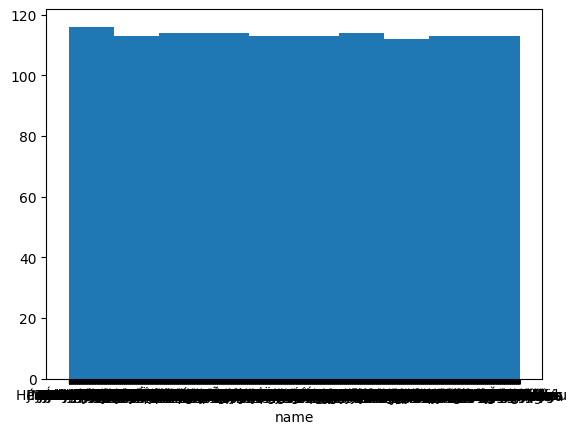

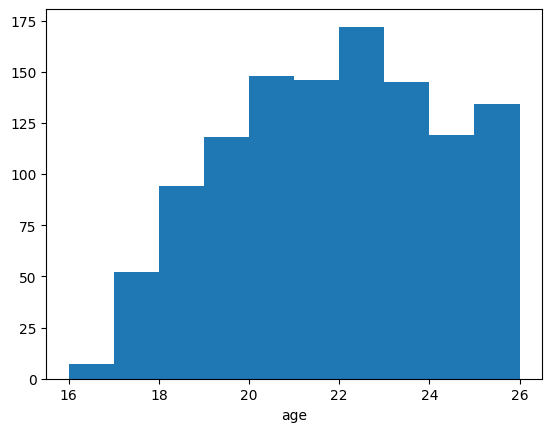

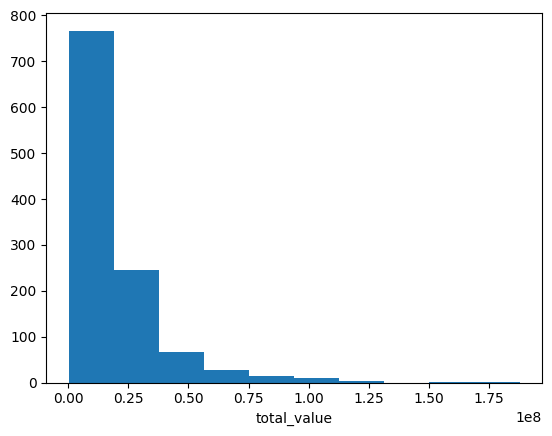

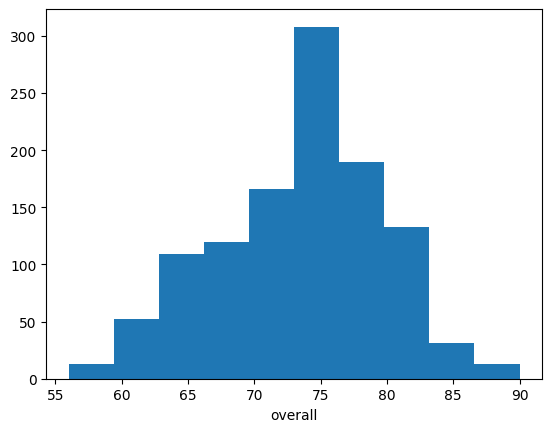

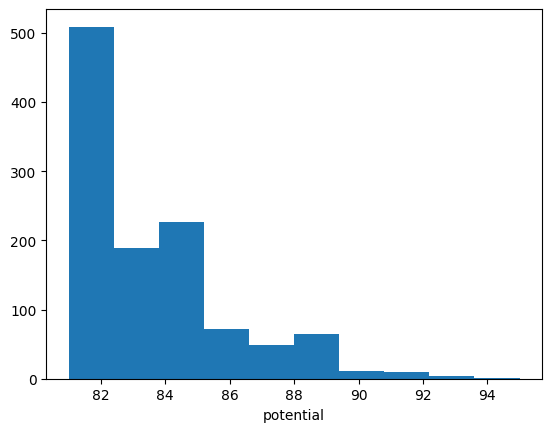

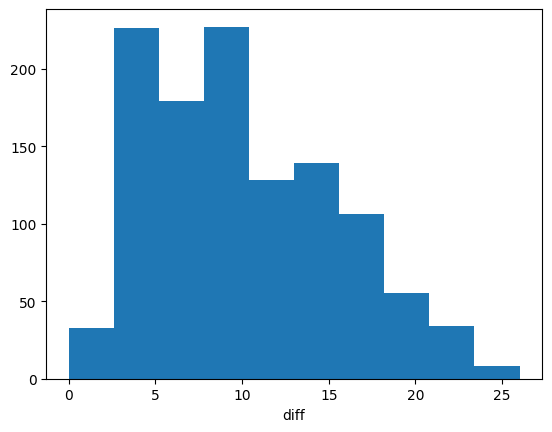

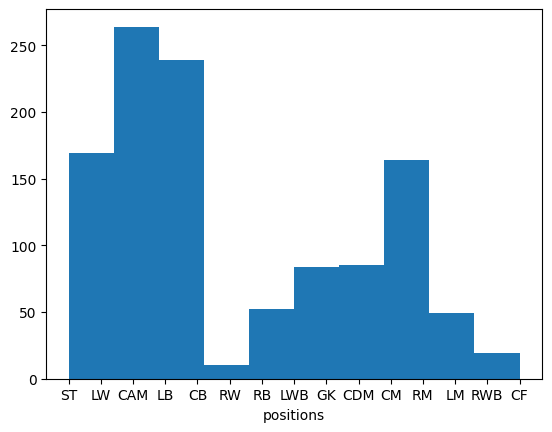

KeyError: 'positioning'

In [59]:
for i in range(len(data_m.columns)):
    plt.hist(data[data_m.columns[i]])
    plt.xlabel(data_m.columns[i])
    plt.show()